# 07-01 순환 신경망(Recurrent Neural Network, RNN)

RNN(Recurrent Neural Network): 입력과 출력을 시퀀스 단위로 처리하는 시퀀스 모델
- 시퀀스: 문장과 같이 단어가 나열된 것
- 시퀀스 모델: 시퀀스들을 처리하기 위해 고안된 모델

## 1. 순환 신경망(Recurrent Neural Network, RNN)

피드 포워드 신경망(Feed Forward Neural Network): 은닉층에서 활성화 함수를 지난 값들이 오직 출력층 방향으로만 향하는 신경망

> RNN은 feed forward 신경망이 아니다!
1. RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로 보내면서
2. 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 가진다.

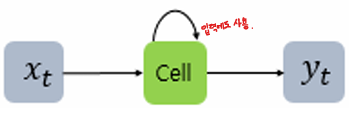

> 편향은 생략한 상태

$x$: 입력층의 입력벡터

$y$: 출력층의 출력벡터

셀(cell): RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드
- 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로, **메모리 셀** 또는 **RNN 셀**이라고 한다.
- 은닉층의 메모리 셀은 각각의 시점(time step)에서, 바로 이전 time step에서의 은닉층의 메모리 셀에서 나온 값을 자신의 입력으로 사용하는 재귀적 활동을 한다.
- 해당 책에서는 **현재 시점**을 변수 $t$로 표시함
- 즉, 현재 시점 t에서의 메모리 셀이 가지고 있는 값은 과거의 메모리 셀들의 값에 영향을 받음

hidden state(은닉 상태): 메모리 셀이 출력층 방향으로 또는 다음 시점 t+1의 자신에게 보내는 값
- 즉, 메모리 셀이 가지고 있는 값
- $t$시점의 메모리 셀은 $t-1$시점의 메모리 셀이 보낸 hidden state를 $t$시점의 hideen state 계산을 위한 입력값으로 사용함

***RNN의 표현방법***

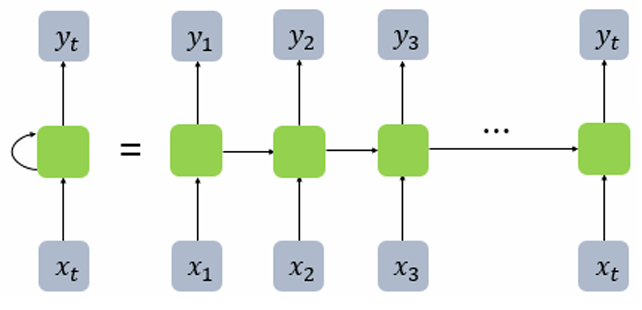

<화살표로 사이클 표시>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<사이클을 그리는 화살표 대신 여러 time step(시점)으로 펼쳐서 표현한 형태>

위의 두 표현 모두 동일한 RNN의 표현이다.

***단위 표현의 차이***

feed forward 신경망
- 뉴런이라는 단위를 사용

RNN
- 입력층: 입력 벡터
- 출력층: 출력 벡터
- 은닉층: hidden state
> 위에서 회색과 초록색으로 표현한 각 네모들은 기본적으로 벡터단위 가정.

RNN이 timestep=2일때의 모습일 때를 예제로 들어, 표현의 차이를 좀 더 살펴보자

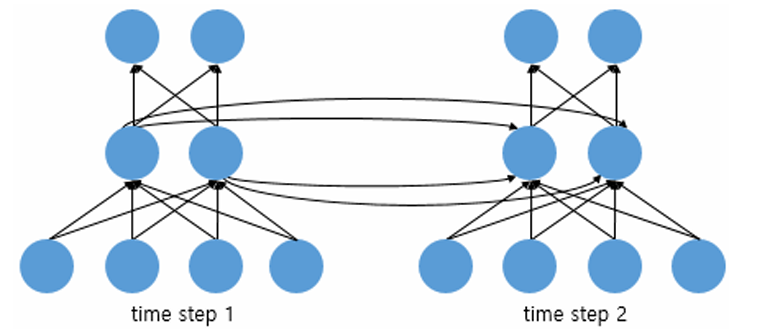

입력벡터의 차원: 4 == 입력층의 뉴런수 : 4

hidden state 크기: 2 == 은닉층의 뉴런수: 2

출력벡터의 차원: 2 == 출력층의 뉴런수: 2

***RNN의 용도***

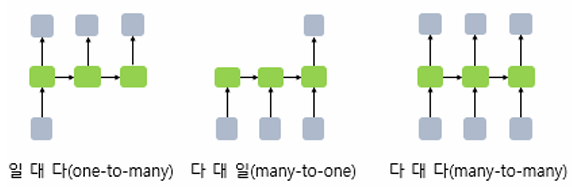

RNN은 입력과 출력의 길이를 다르게 설계 가능.

RNN 셀의 각 time step 별 입출력 단위는 보편적으로 '단어벡터'
- ex. 하나의 입력에 대해서 여러개의 출력(one-to-many) 모델은 하나의 이미지 입력에 대해 사진의 제목을 출력하는 이미지 캡셔닝(Image Captioning) 작업에 사용가능

- many-to-one 모델은 아래와 같은 상황에 사용 가능
    - 입력문서가 긍정적인지 부정적인지 판별하는 감성 분류(sentiment classification)
    - 메일이 정상 메일인지 스팸 메일인지 판별하는 스팸 메일 분류(spam detection)  
    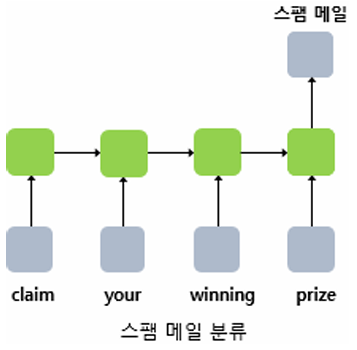


- many-to-many 모델은 아래와 같은 상황에 사용 가능
    - 입력 문장으로부터 대답 문장을 출력하는 챗봇
    - 입력 문장으로부터 번역된 문장을 출력하는 번역기
    - 개체명 인식이나 품사 태깅  
    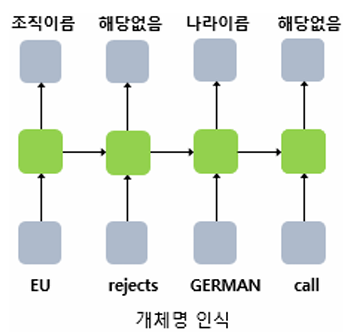

***RNN에 대한 수식***

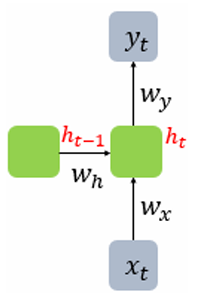

**변수 설명**

$h_t$: 현재 시점 t에서의 hidden state값

은닉층의 메모리 셀은 $h_t$를 계산하기 위해 총 2개의 가중치를 가짐
1. $W_x$: 입력층에서 입력값을 위한 가중치
2. $W_h$: 이전 time step $t-1$의 hidden state값인 $h_{t-1}$을 위한 가중치

**수식**

은닉층: $h_t = \tanh(W_xx_t + W_hh_{t-1} + b)$

출력층: $y_t = f(W_yh_t + b)$
- $f$: 비선형 활성화 함수 중 하나

각각의 가중치 $W_x, W_h, W_y$의 값은 모든 time step에서 동일하게 공유됨
- 즉, 모든 time step에서 사용되는 가중치의 값은 변하지 않음
- 은닉층이 2개 이상일 경우에는, 은닉층 2개의 가중치는 서로 다름

***RNN의 연산***

입력 $x_t$: 대부분의 경우 단어벡터

$d$: 단어벡터의 차원

$D_h$: hidden state의 크기

<br>

**각 벡터와 행렬의 크기**

- $x_t: (d \times 1)$
- $W_x: (D_h \times d)$
- $h_{t-1}: (D_h \times 1)$
- $W_h: (D_h \times D_h)$
- $b: (D_h \times 1)$

배치크기가 1이고, $d$와 $D_h$ 모두 4로 가정하였을 때, RNN의 은닉층 연산을 표현하면 아래와 같다.

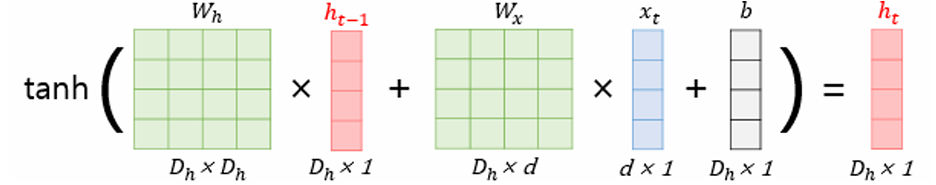

$h_t$를 계산하기 위한 활성화함수로는 주로 하이퍼볼릭탄젠트 함수(tanh)가 사용됨
- ReLU로 바꿔서 사용하기도 함

## 2. 파이썬으로 RNN 구현하기

In [2]:
import numpy as np

timesteps = 10  # 시점의 수. NLP에서는 보통 문장의 길이가 된다. 즉, 입력데이터의 길이 == 총 시점의 수(timesteps)
input_size = 4  # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # hidden state의 크기. 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_size))  # 입력에 해당되는 2D 텐서
hidden_state_t = np.zeros((hidden_size, ))   # 초기 hidden state는 0(벡터)로 초기화
# hidden state의 크기 hidden_size로 hidden state를 만듦

In [3]:
print(hidden_state_t)   # 8의 크기를 가지는 hidden_state. 현재는 초기 hidden_state로 모든 차원의 0의 값을 가짐

[0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
# 가중치와 편향 정의
Wx = np.random.random((hidden_size, input_size))    # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치
Wh = np.random.random((hidden_size, hidden_size))   # (8, 8) 크기의 2D 텐서 생성. 은닉 상태에 대한 가중치
b = np.random.random((hidden_size, ))   # (8, )크기의 1D 텐서 생성. 편향(bias)

In [5]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


In [6]:
# 모든 timestep의 hidden state 출력
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs:  # 각 시점에 따라서 입력값이 입력됨
    output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b)  # Wx * Xt + Wh * Ht-1 + b(bias)
    total_hidden_states.append(list(output_t))  # 각 시점의 hidden state 값을 계속해서 축적
    print(np.shape(total_hidden_states))    # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
    hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis=0) # 출력시 값을 깔끔하게 해준다.
print(total_hidden_states)  # (timesteps, output_dim)의 크기. 이 경우(10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.80531454 0.93170023 0.97999645 0.93782144 0.89106458 0.84990415
  0.90049622 0.88858835]
 [0.99111883 0.9999939  0.99998508 0.99997576 0.99972965 0.9999941
  0.99998493 0.99961886]
 [0.99276026 0.99999101 0.99998433 0.99998062 0.99969769 0.9999955
  0.99999014 0.99923948]
 [0.98558417 0.9999723  0.99995236 0.99995067 0.99898022 0.99999249
  0.99998441 0.99769188]
 [0.99020038 0.99999651 0.99998974 0.99998517 0.99950429 0.99999737
  0.99999258 0.99956705]
 [0.98477419 0.99999621 0.99998104 0.99997909 0.9991897  0.99999774
  0.99999229 0.99953204]
 [0.99416888 0.99999866 0.99999478 0.99999171 0.99979108 0.99999868
  0.99999596 0.99982479]
 [0.99305448 0.99999863 0.99999617 0.99999169 0.9996136  0.99999836
  0.99999542 0.99976668]
 [0.99631164 0.99999753 0.99999631 0.99999137 0.99982212 0.99999784
  0.99999567 0.99967579]
 [0.99082377 0.99999641 0.99998152 0.99997832 0.99952707 0.99999851
  0.99999561 0.99957589]]


## 3. 파이토치의 nn.RNN()

In [7]:
import torch
import torch.nn as nn

In [8]:
input_size = 5  # 매 timestep마다 들어가는 입력의 크기
hidden_size = 8 # hidden state의 크기

In [9]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [10]:
cell = nn.RNN(input_size, hidden_size, batch_first=True)

In [11]:
outputs, _status = cell(inputs)

In [12]:
print(outputs.shape) # 모든 timestep의 hidden state

torch.Size([1, 10, 8])


In [13]:
print(_status.shape)    # 최종 time step의 hidden state

torch.Size([1, 1, 8])


## 4. 깊은 순환 신경망(Deep Recurrent Neural Network)

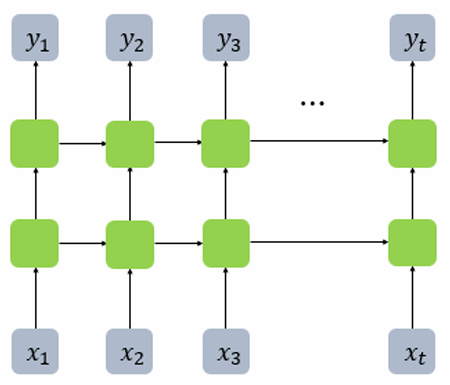

In [14]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [15]:
# num_layers: 층을 쌓는다.
cell = nn.RNN(input_size=5, hidden_size=8, num_layers=2, batch_first=True)

In [16]:
# RNN 셀은 두 개의 입력을 리턴하는데,
# 첫번째 리턴값은 모든 시점(timesteps)의 은닉 상태들이며,
# 두번째 리턴값은 마지막 시점(timestep)의 은닉 상태입니다.
outputs, _status = cell(inputs)

In [17]:
print(outputs.shape)# 모든 timestep의 hidden state

torch.Size([1, 10, 8])


In [18]:
# (층의 개수, 배치 크기, hidden_state의 크기)
print(_status.shape)

torch.Size([2, 1, 8])


## 5. 양방향 순환 신경망(Bidirectional Recurrent Neural Network)

In [19]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [20]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers=2, batch_first=True, bidirectional=True)

In [21]:
outputs, _status = cell(inputs)

In [22]:
print(outputs.shape)    # (배치크기, 시퀀스의 길이, hidden state의 크기 X 2)

torch.Size([1, 10, 16])


In [23]:
print(_status.shape)    # (은닉층의 개수 X 2, 배치 크기, 은닉 상태의 크기)

torch.Size([4, 1, 8])


# 07-02 LSTM과 GRU

## 1. 바닐라 RNN의 한계

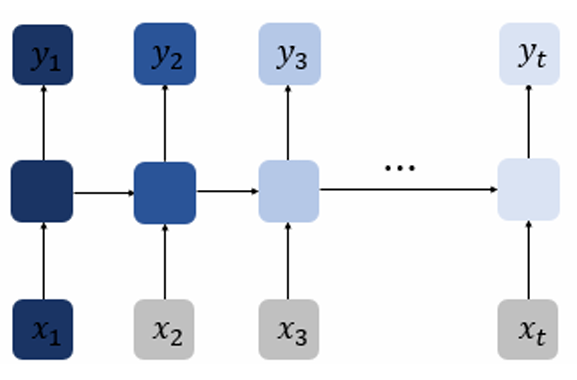

바닐라 RNN(Vanilla RNN): 앞에서 배운 가장 간단한 형태의 RNN
- 바닐라 RNN은 출력 결과가 이전의 계산 결과에 의존한다.
- 단점: 바닐라 RNN은 비교적 짧은 시퀀스(sequence)에 대해서만 효과를 보인다.
- 따라서, 바닐라 RNN의 시점(time step)이 길어질수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생한다.
    - 위의 사진에서 x1의 정보량(짙은 남색)이 뒤로 갈수록 손실되고 있는 것을 확인 가능(색이 점차 옅어짐)
    - 즉, timestep이 충분히 긴 상황에서는 전체 정보에 대한 x1의 영향력은 거의 없을 수 있음

<br>

아래와 같은 문장의 단어를 예측하는 과정을 생각해보자.(가장 중요한 정보가 시점의 앞 쪽에 위치하는 경우)

> 모스크바에 여행을 왔는데 건물도 예쁘고 먹을 것도 맛있었어. 그런데 글쎄 직장 상사한테 전화가 왔어.어디냐고 묻더라구 그래서 나는 말했지.저 여행 왔는데요. 여기 ___

<br>

위와 같은 경우 바닐라 RNN에서는 장기 의존성 문제가 발생함.

**장기 의존성 문제**(the problem of Long-Term Dependencies): RNN이 충분한 기억력을 가지고 있지 못하여 다음 단어를 엉뚱하게 예측하는 현상





## 2. Vanilla RNN 내부 열어보기

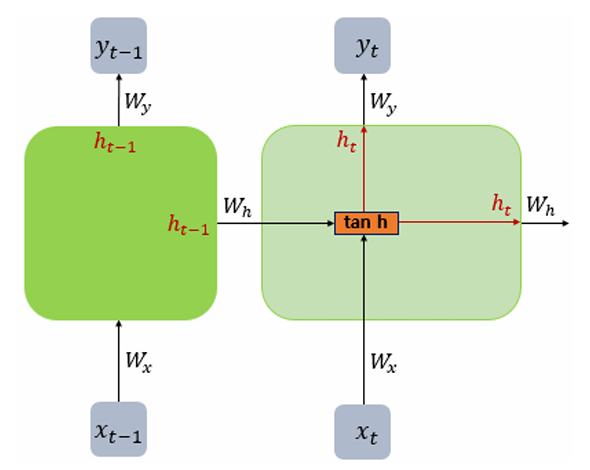

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<바닐라 RNN의 내부구조>
> 이 책에서는 RNN 계열의 인공신경망의 그림에서는 편향을 생략함

바닐라 RNN의 수식: $h_t = \tanh(W_xx_t + W_hh_{t-1} + b)$
- $x_t$와 $h_{t-1}$이라는 2개의 입력이 각각의 가중치와 곱해져서 메모리 셀(초록색 박스)의 입력이 됨
- 입력값을 하이퍼볼릭탄젠트 함수에 넣으면 은닉층의 출력인 hidden state가 됨



## 3. LSTM(Long Short-Term Memory)

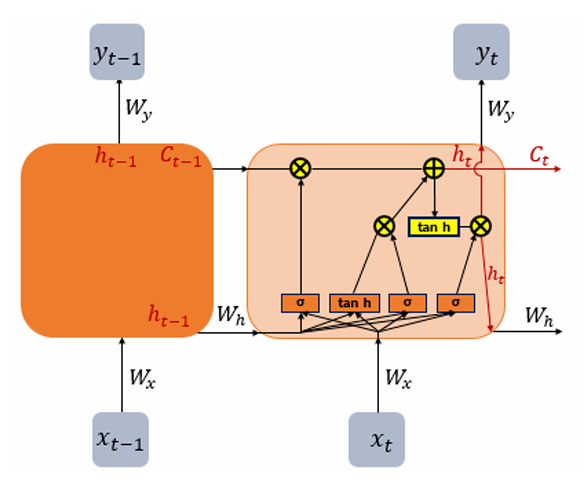

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <LSTM의 내부 구조>

장단기 메모리(Long Short-Term Memory, **LSTM**): 장기 의존성 문제를 보완한 RNN의 일종
- LSTM은 hidden state를 계산하는 식이 바닐라 RNN보다 복잡해졌으며, 셀상태(cell state, $C_t$)라는 값을 추가함.
- LSTM은 RNN과 비교하여 **긴 시퀀스의 입력을 처리**하는데 더 좋은 성능을 보임

> 상단의 노란색 (X), (+) 원들은 곱하기와 덧셈 기호임

***Cell State(셀상태)***

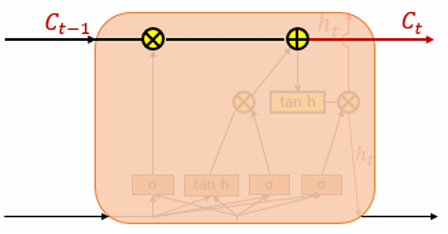

cell state($C_t$)도 hidden state처럼 이전 시점의 cell state가 -> 다음시점의 cell state를 구하기 위한 입력으로서 사용됨

LSTM은 hidden state값과 cell state값을 구하기 위해서 은닉층의 메모리 셀에 **입력 게이트, 삭제 게이트, 출력 게이트**라는 3개의 게이트를 추가함.
- 3개의 게이트에는 공통적으로 시그모이드 함수($σ$)가 존재하며, 시그모이드 함수의 출력값인 0~1사이의 값을 통해 게이트를 조절함

***LSTM의 게이트 이해***

**변수 정리**
- $σ$: 시그모이드 함수
- $\tanh$: 하이퍼볼릭 탄젠트 함수
- $𝑊_{𝑥𝑖},𝑊_{𝑥𝑔},𝑊_{𝑥𝑓},𝑊_{𝑥𝑜}$ 는$𝑥_𝑡$와 함께 각 게이트에서 사용되는 4개의 가중치
- $𝑊_{ℎ𝑖},𝑊_{ℎ𝑔},𝑊_{ℎ𝑓},𝑊_{ℎ𝑜}$ 는$ℎ_{𝑡−1}$와 함께 각 게이트에서 사용되는 4개의 가중치

### 1) 입력 게이트

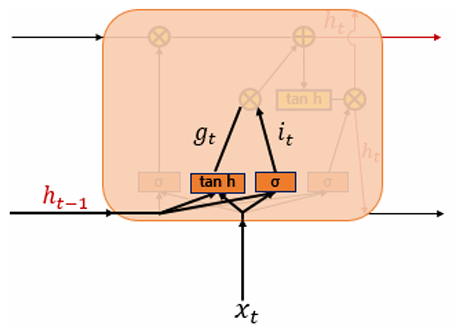

입력 게이트: **현재 정보를 기억**하기 위한 게이트

***입력게이트의 출력 값***

$i_t = σ(W_{xi}x_t + W_{hi}h_{t-1} + b_i)$
- 0과 1사이의 값

$g_t = tanh(W_{xg}x_t + W_{hg}h_{t-1} + b_g)$
- -1과 1사이의 값

위의 이 2개의 값을 가지고 Cell State 수식을 통해 이번에 선택된 정보 중 기억할 양을 정함


### 2) 삭제 게이트

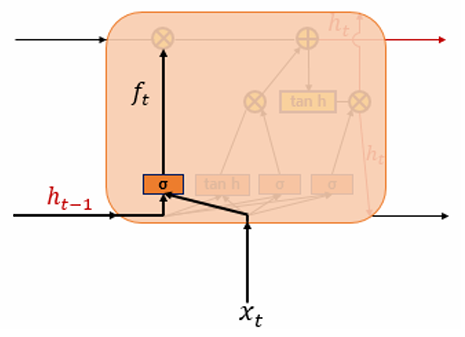

삭제 게이트: 기억을 삭제하기 위한 게이트

***삭제 게이트의 출력값***

$f_t = σ(W_{xf}x_t + W_{hf}h_{t-1} + b_f)$
- 현재 시점 t의 x값과 이전 시점 t-1의 hidden state가 시그모이드 함수를 지남
- 0과 1사이의 값이 나오며, 이 값이 **삭제 과정을 거친 정보의 양**임
    - 0에 가까울수록: 정보가 많이 삭제됨
    - 1에 가까울수록: 정보를 온전히 기억함

이 값을 가지고 Cell State 수식을 통해 Cell State를 구함

### 3) 셀 상태(장기 상태)

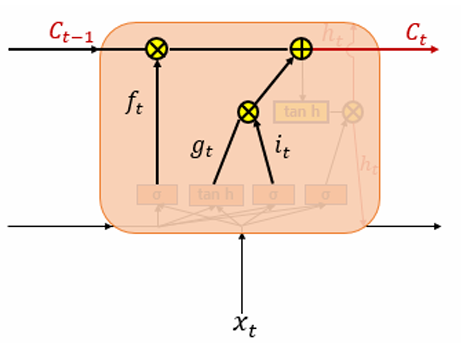

Cell state(셀상태) $C_t$를 LSTM에서 **장기상태**라고 하기도 함.

삭제 게이트에서 일부 기억을 잃은 상태를 가정하고, 셀상태를 구하는 방법을 알아보자.

<br>

***현재 시점 t의 Cell state의 수식***

$C_t = f_t \cdot C_{t-1} + i_t \cdot g_t$
1. (X): 입력 게이트에서 구한 출력값들끼리 elementwise product(원소별 곱)을 진행함.
    - 원소별 곱: 두 행렬이 있을 때 같은 위치의 entry끼리 곱하는 것
    - 곱을 진행한 것이 이번에 선택된 기억할 값
2. 입력게이트에서 선택된 기억을 삭제 게이트의 결과값과 더함.
    - 이 최종 값($C_t$)을 **현재 시점 t의 Cell State**라고 함.
    - 이 값은 다음 시점 t+1의 LSTM 셀로 넘겨짐

<br>

***삭제 게이트와 입력 게이트의 영향력***

1. 삭제 게이트의 출력값인 $f_t$ = 0이라면?
    - 이전 시점의 셀 상태값인 C_{t-1}이 $C_t$에 대한 영향력이 0이 되면서, 입력 게이트 결과만이 $C_t$를 결정할 수 있음
    - 즉, 삭제 게이트를 완전히 닫고 입력 게이트만을 연 상태

2. 입력 게이트의 $i_t$나 $g_t$의 값이 0이라면?
    - $C_t$는 이전 시점의 셀 상태 값인 $C_{t-1}$에 의존함
    - 즉, 입력 게이트를 완전히 닫고 삭제 게이트만을 연 상태

<br>

즉, 게이트의 역할을 요약하면 아래와 같음

- 삭제 게이트: 이전 시점의 입력을 얼마나 반영할지를 결정함
- 입력 게이트: 현재 시점의 입력을 얼마나 반영할지를 결정함

### 4) 출력 게이트와 은닉 상태(단기 상태)

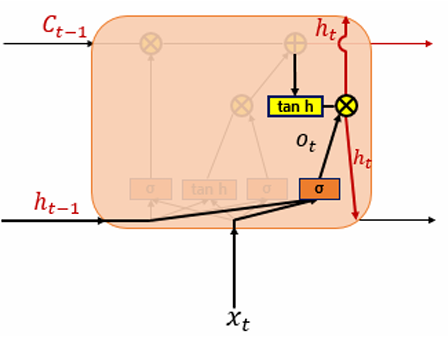

***출력 게이트의 출력값***

$o_t = σ(W_{xo}x_t + W_{ho}h_{t-1} + b_o)$
- 출력게이트의 출력값으로, 현재 시점 t의 hidden state인 $h_t$를 결정하는 데 사용

$h_t = o_t \cdot \tanh(C_t)$
- hidden state를 **단기 상태**라고 하기도 함.
- 장기 상태(Cell State)값이 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값이  출력 게이트의 값과 곱해짐 -> 값이 걸러지는 효과 발생시킨다고 함
- 단기 상태의 값($h_t$)은 출력층으로도 향함

## 4. 파이토치의 nn.LSTM()

함수 이름이 바뀐 것 말고는 동일함
```python
# 기존 RNN 셀
nn.RNN(input_dim, hidden_size, batch_first=True)

# LSTM 셀
nn.LSTM(input_dim, hidden_size, batch_first=True)
```

## 5. GRU(Gated Recurrent Unit)

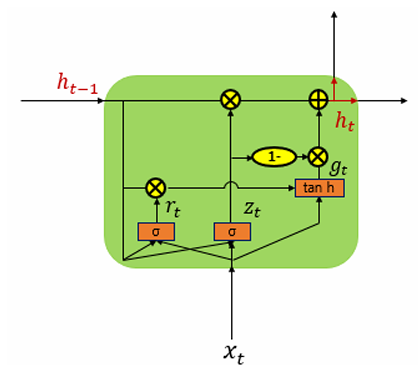

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <GRU의 내부 구조>

GRU: LSTM의 장기 의존성 문제에 대한 해결책을 유지하면서, hidden state를 업데이트하는 계산을 줄인 모델

GRU에는 2개의 게이트만이 존재
1. 업데이트 게이트
2. 리셋 게이트

$r_t = \sigma(W_{xr}x_t + W_{hr}h_{t-1}+b_r$

$r_t = \sigma(W_{xz}x_t + W_{hz}h_{t-1}+b_z$

$g_t = \tanh(W_{hg}(r_t \cdot h_{t-1}) + W_{xg}x_t + b_g)$

$h_t = (1-z_t) \cdot g_t + z_t \cdot h_{t-1}$

기존에 LSTM을 사용하면서 최적의 하이퍼파라미터를 찾아낸 상황이라면 굳이 GRU로 바꾸어 사용할필요는 없음.

> 경험적으로 아래의 상황에 추천
1. 데이터 양이 적을 때 -> 매개변수의 양이 적은 GRU 사용
2. 데이터 양이 많을 때 -> LSTM 사용

## 6. 파이토치의 nn.GRU()
함수 이름이 바뀐 것 말고는 동일함

```python
# 기존 RNN 셀
nn.RNN(input_dim, hidden_size, batch_first = True)

# GRU 셀
nn.GRU(input_dim, hidden_size, batch_first=True)
```

# 07-03 문자단위 RNN(Char RNN): 실습 2개

문자 단위 RNN: 입출력 단위가 단어 레벨(word-level)이 아니라 문자 레벨(character-level)인 RNN
- RNN 구조 자체가 달라진 것은 아니고, 입출력 단위가 문자로 바뀌었을 뿐임

## 1. 문자 단위 RNN(Char RNN)

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

### 1) 훈련 데이터 전처리하기

***문자 집합 생성***

아래 셀에서 설명하는 문자집합은 중복을 제거한 문자들의 집합이다.

In [25]:
# 입력 데이터와 레이블 데이터에 대해서 문자 집합(vocabulary)를 만든다.
input_str = 'apple'
label_str = 'pple!'
char_vocab = sorted(list(set(input_str + label_str)))
vocab_size = len(char_vocab)
print('문자 집합의 크기:{}'.format(vocab_size))

문자 집합의 크기:5


***하이퍼파라미터 정의***

In [26]:
input_size = vocab_size # 입력의 크기는 문자집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1

In [27]:
# 문자 집합에 고유한 정수 부여
char_to_index = dict((c, i) for i, c in enumerate(char_vocab))  # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


In [28]:
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key
print(index_to_char)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}


In [29]:
# 입력 데이터와 레이블 데이터의 각 문자들을 정수로 맵핑
x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)   # a, p, p, l, e에 해당
print(y_data)   # p, p, ㅣ, e, !에 해당

[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


In [30]:
# 배치차원 추가
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


In [31]:
# 입력 시퀀스의 각 문자들을 원-핫 벡터로 변환
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


In [32]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

<ipython-input-32-c1bfbd518a63>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X = torch.FloatTensor(x_one_hot)


In [33]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])


### 2) 모델 구현하기

In [34]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)  # RNN 셀 구현
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True)  # 출력층 구현
    def forward(self, x):   # 구현한 RNN 셀과 출력층을 연결
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [35]:
net = Net(input_size, hidden_size, output_size)

In [36]:
outputs = net(X)
print(outputs.shape)    # 3차원 텐서

torch.Size([1, 5, 5])


In [37]:
print(outputs.view(-1, input_size).shape)   # 2차원 텐서로 변환

torch.Size([5, 5])


In [38]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([1, 5])
torch.Size([5])


In [39]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [40]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1))  # view를 하는 이유는 Batch 차원 제거를 위해
    loss.backward()
    optimizer.step()    # optimizer 선언시 넣어둔 파라미터 업데이트

    # 아래 세줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드
    result = outputs.data.numpy().argmax(axis=2)    # 각 time-step별 5차원 벡터(3번쨰 차원)에 대해서 가장 높은 값의 인덱스를 선택
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i,"loss: ", loss.item(), "prediction: ", result, "true Y:", y_data, "prediction str: ", result_str)

0 loss:  1.6659427881240845 prediction:  [[4 0 0 0 2]] true Y: [[4, 4, 3, 2, 0]] prediction str:  p!!!e
1 loss:  1.3697019815444946 prediction:  [[4 3 3 3 3]] true Y: [[4, 4, 3, 2, 0]] prediction str:  pllll
2 loss:  1.1729077100753784 prediction:  [[4 3 3 3 3]] true Y: [[4, 4, 3, 2, 0]] prediction str:  pllll
3 loss:  0.9747219085693359 prediction:  [[4 4 4 2 2]] true Y: [[4, 4, 3, 2, 0]] prediction str:  pppee
4 loss:  0.8109588623046875 prediction:  [[4 4 4 2 0]] true Y: [[4, 4, 3, 2, 0]] prediction str:  pppe!
5 loss:  0.6867295503616333 prediction:  [[4 4 4 2 0]] true Y: [[4, 4, 3, 2, 0]] prediction str:  pppe!
6 loss:  0.5914070010185242 prediction:  [[4 4 4 2 0]] true Y: [[4, 4, 3, 2, 0]] prediction str:  pppe!
7 loss:  0.5000829100608826 prediction:  [[4 4 4 2 0]] true Y: [[4, 4, 3, 2, 0]] prediction str:  pppe!
8 loss:  0.421580970287323 prediction:  [[4 4 3 2 0]] true Y: [[4, 4, 3, 2, 0]] prediction str:  pple!
9 loss:  0.3492894768714905 prediction:  [[4 4 3 2 0]] true Y: [[

## 2. 더 많은 데이터로 학습한 문자 단위 RNN(Char RNN)

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim

### 1) 훈련 데이터 전처리하기

In [42]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [43]:
char_set = list(set(sentence))  # 중복을 제거한 문자집합 생성
char_dic = {c: i for i, c in enumerate(char_set)}   # 각 문자에 정수 인코딩

In [44]:
print(char_dic) # 공백도 여기서는 하나의 원소

{'b': 0, 'g': 1, "'": 2, 'o': 3, 'd': 4, 'i': 5, 'n': 6, 'l': 7, 'p': 8, 'e': 9, 'm': 10, 't': 11, ' ': 12, 'h': 13, 'y': 14, 'w': 15, '.': 16, 'a': 17, 'f': 18, 'k': 19, 'r': 20, 'c': 21, ',': 22, 's': 23, 'u': 24}


In [45]:
dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

문자 집합의 크기 : 25


***하이퍼파라미터 설정***

In [46]:
hidden_size = dic_size
sequence_length = 10    # 임의 숫자 지정
learning_rate = 0.1

In [47]:
# 데이터 구성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i+sequence_length]
    y_str = sentence[i+1: i+sequence_length+1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str]) # x str to index
    y_data.append([char_dic[c] for c in y_str]) # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [48]:
print(x_data[0])
print(y_data[0])

[5, 18, 12, 14, 3, 24, 12, 15, 17, 6]
[18, 12, 14, 3, 24, 12, 15, 17, 6, 11]


In [49]:
x_one_hot = [np.eye(dic_size)[x] for x in x_data]   # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [50]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([170, 10, 25])
레이블의 크기 : torch.Size([170, 10])


In [51]:
print(X[0])

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [52]:
print(Y[0])

tensor([18, 12, 14,  3, 24, 12, 15, 17,  6, 11])


### 2) 모델 구현하기

In [53]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):  # 현재 hidden size는 dic_size와 같음
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        """
        x: 모든 time step별 hidden state
        _status: 마지막 timestep의 hidden state
        """
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [54]:
net = Net(dic_size, hidden_size, 2) # 이번에는 층을 2개 쌓습니다.

In [55]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [56]:
outputs = net(X)
print(outputs.shape)    # 3차원 텐서

torch.Size([170, 10, 25])


In [57]:
print(outputs.view(-1, dic_size).shape)

torch.Size([1700, 25])


In [59]:
# 레이블의 크기
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([170, 10])
torch.Size([1700])


In [61]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)    # (170, 10, 25)크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    # results의 텐서 크기는 (170, 10)
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0:  # 처음에는 예측 결과를 전부 가져오지만
            predict_str += ''.join(char_set[t] for t in result)
        else:   # 그 다음에는 마지막 글자만 반복 추가
            predict_str += char_set[result[-1]]

    print(predict_str)

oooooooooooooooooouooooooooooooooooooooooooooooucoooooofooooooooucooooooooooooooooooooooooooofoooooooooooooooooooooooooofoooooooooofoooooouooooooouoooooooocoooooocoooooooooofooooo
   o  ho    o  o    ho o     o          o  o      o       oo  o       o    o   o            o   ho         o     o   o      o  o      ho  o    o   o   o   o             o  o   o  
        o oto      oto o     o    to o t         to              o   to   to oto o   o          to o o o oto     o o o   o        o o t      o o       o oto o o                o  
  h.opo o.,fo'yfooeofoeouoeocouo ofouoffo'fo' ofoufyyuuor fo'foryupo .,of fo ofoeo.yfo ffe yfo' eo'yfoeo.oworc,pfo.foopofyeeuyfe'fofo foo.f'e wo ofo'rff'owo oeo oeoofoeo.fpo'fuoop
e    ee  eoee e  te ee ee e e eee e ee e ee eee ee  e  e  e eeo ee e e  esee eeoee  te ee eee   e ee  ee eee ee ee ee eee ee ee eeeee t ee  e e  ee eee e e  ee  e e ee ee e e e e 
e d oth ntoto de te to t  toi nto dh t te oe hh tto e  e  t     to tos  t i   to    te t  hh n  te  